In [2]:
import data_preparation as dp
import matplotlib.pyplot as plt

from collections import Counter
from wordcloud import WordCloud
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [3]:
# Load the data
sentiment_data = dp.data_loader()
sentiment_data.head()

,sentence_index,sentence,phrase,phrase ids,sentiment values,splitset_label,tokenized_text
0,1,The Rock is destined to be the 21st Century 's...,The Rock is destined to be the 21st Century 's...,226166.0,0.69444,1,"[the, rock, is, destined, to, be, the, 21st, c..."
1,2,The gorgeously elaborate continuation of `` Th...,The gorgeously elaborate continuation of `` Th...,226300.0,0.83333,1,"[the, gorgeously, elaborate, continuation, of,..."
2,3,Effective but too-tepid biopic,Effective but too-tepid biopic,13995.0,0.51389,2,"[effective, but, too-tepid, biopic]"
3,4,If you sometimes like to go to the movies to h...,If you sometimes like to go to the movies to h...,14123.0,0.73611,2,"[if, you, sometimes, like, to, go, to, the, mo..."
4,5,"Emerges as something rare , an issue movie tha...","Emerges as something rare , an issue movie tha...",13999.0,0.86111,2,"[emerges, as, something, rare, ,, an, issue, m..."


In [4]:
# Basic Statistics
num_samples = len(sentiment_data)
avg_length = sentiment_data['tokenized_text'].apply(len).mean()

print(f"Number of samples: {num_samples}")
print(f"Average length of reviews: {round(avg_length, 2)} words")

Number of samples: 11286
Average length of reviews: 18.89 words


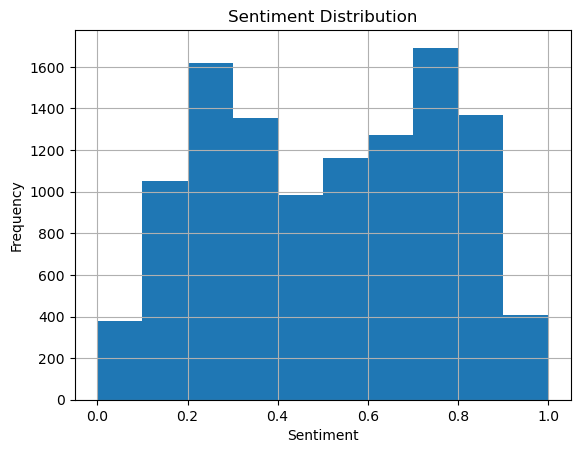

In [5]:
# Sentiment Label Distribution
sentiment_data['sentiment values'].hist()
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

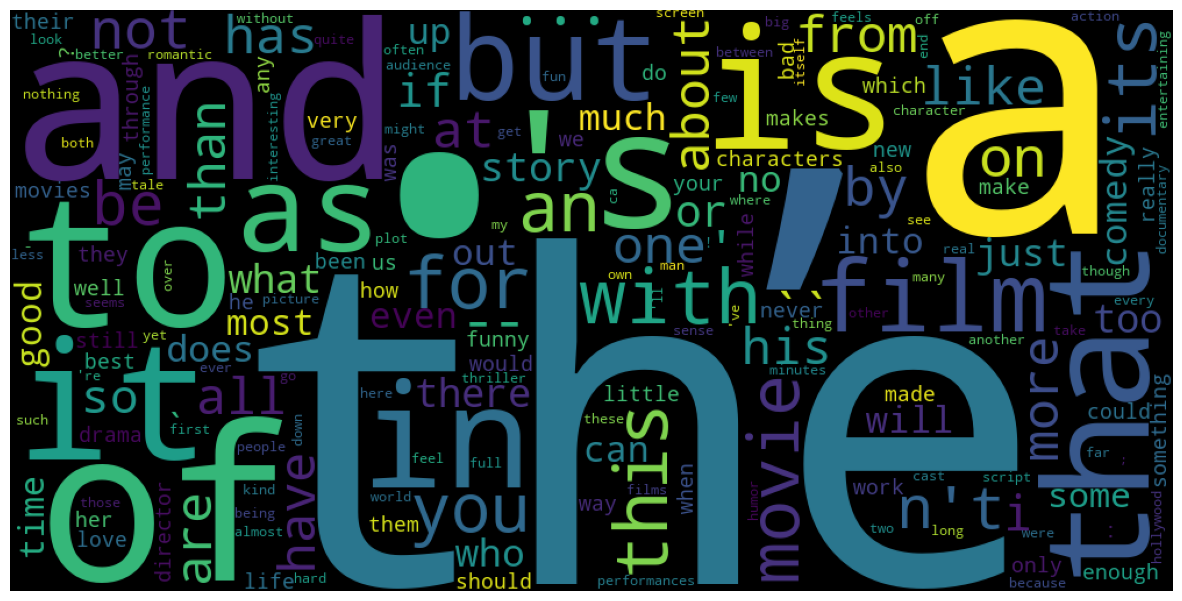

In [6]:
# Word Cloud
word_freq = Counter()
sentiment_data['tokenized_text'].apply(lambda x: word_freq.update(x))
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_freq)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

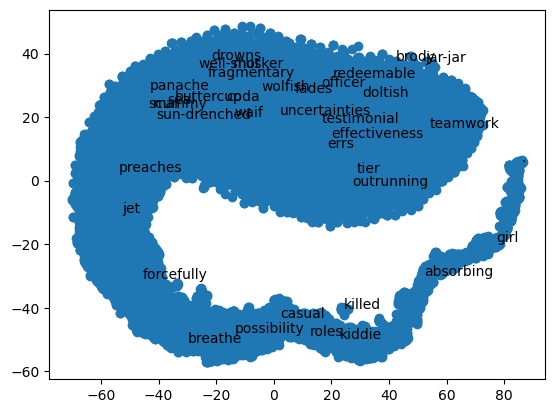

In [6]:
# Train a Word2Vec model
model = Word2Vec(sentiment_data['tokenized_text'], min_count=1)
embeddings = model.wv.vectors
word_list = model.wv.index_to_key

# Visualize the embeddings
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings)

fig, ax = plt.subplots()
for i, (word, (x, y)) in enumerate(zip(word_list, embeddings_2d)):
    if i % 500 == 0:
        ax.annotate(word, (x, y))

ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.show()

In [7]:
sentiment_data = dp.data_preprocessor(sentiment_data)

sentiment_data.head()

,sentence_index,sentence,phrase,phrase ids,sentiment values,splitset_label,tokenized_text,no_punctuation_text,no_stopwords_text,stemmed_text,lemmatized_text
0,1,The Rock is destined to be the 21st Century 's...,The Rock is destined to be the 21st Century 's...,226166.0,0.69444,1,"[the, rock, is, destined, to, be, the, 21st, c...","[the, rock, is, destined, to, be, the, 21st, c...","[rock, destined, 21st, century, 's, new, ``, c...","[the, rock, is, destin, to, be, the, 21st, cen...","[the, rock, is, destined, to, be, the, 21st, c..."
1,2,The gorgeously elaborate continuation of `` Th...,The gorgeously elaborate continuation of `` Th...,226300.0,0.83333,1,"[the, gorgeously, elaborate, continuation, of,...","[the, gorgeously, elaborate, continuation, of,...","[gorgeously, elaborate, continuation, ``, lord...","[the, gorgeous, elabor, continu, of, ``, the, ...","[the, gorgeously, elaborate, continuation, of,..."
2,3,Effective but too-tepid biopic,Effective but too-tepid biopic,13995.0,0.51389,2,"[effective, but, too-tepid, biopic]","[effective, but, too-tepid, biopic]","[effective, but, too-tepid, biopic]","[effect, but, too-tepid, biopic]","[effective, but, too-tepid, biopic]"
3,4,If you sometimes like to go to the movies to h...,If you sometimes like to go to the movies to h...,14123.0,0.73611,2,"[if, you, sometimes, like, to, go, to, the, mo...","[if, you, sometimes, like, to, go, to, the, mo...","[sometimes, like, go, movies, fun, ,, wasabi, ...","[if, you, sometim, like, to, go, to, the, movi...","[if, you, sometimes, like, to, go, to, the, mo..."
4,5,"Emerges as something rare , an issue movie tha...","Emerges as something rare , an issue movie tha...",13999.0,0.86111,2,"[emerges, as, something, rare, ,, an, issue, m...","[emerges, as, something, rare, an, issue, movi...","[emerges, something, rare, ,, issue, movie, 's...","[emerg, as, someth, rare, ,, an, issu, movi, t...","[emerges, a, something, rare, ,, an, issue, mo..."
